# Preparando os Dados

In [ ]:
!git clone https://github.com/Dkmister/NautilusVideos

Cloning into 'NautilusVideos'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 1.72 MiB | 5.02 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd NautilusVideos
!ls

/content/NautilusVideos
comments_nautilusl.csv	LICENSE  LOGO.png  README.md  videos_nautilusl.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("videos_nautilusl.csv")

df.fillna(0, inplace=True)
df.describe()

,Unnamed: 0,viewCount,likeCount,favouriteCount,commentCount,tagsCount,likeRatio,commentRatio,titleLength
count,809.000000,8.090000e+02,809.000000,809.0,809.000000,809.000000,809.000000,809.000000,809.000000
mean,404.000000,3.751232e+04,4067.103832,0.0,148.158220,32.442522,117.736559,4.295507,47.114957
std,233.682477,5.625635e+04,4037.191405,0.0,175.175639,9.911213,33.439846,3.061238,19.258543
min,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000
25%,202.000000,1.464700e+04,1966.000000,0.0,52.000000,27.000000,94.762613,2.447708,34.000000
50%,404.000000,2.644100e+04,3141.000000,0.0,95.000000,34.000000,116.516884,3.563677,43.000000
75%,606.000000,4.525800e+04,5146.000000,0.0,188.000000,39.000000,138.639914,5.157810,60.000000
max,808.000000,1.284517e+06,69472.000000,0.0,2108.000000,56.000000,266.145207,37.910260,100.000000


# Descrição dos dados

1. **Unnamed:** 0: Pode ser apenas o índice do dataframe, uma coluna extra sem 2; relevância analítica.
2. **video_id:** O identificador único do vídeo no YouTube.
3. **channelTitle:** Nome do canal que publicou o vídeo.
4. **title:** Título do vídeo.
5. **description**: Descrição fornecida pelo autor do vídeo.
6. **tags**: Lista de tags associadas ao vídeo (ajuda a categorizar o conteúdo).
7. **publishedAt**: Data e hora de publicação do vídeo.
8. **viewCount**: Número de visualizações do vídeo.
9. **likeCount**: Número de "likes" no vídeo.
10. **favouriteCount**: Normalmente é o número de vezes que o vídeo foi favoritado, mas pode ser sempre zero (como aqui) porque essa funcionalidade não é amplamente usada.
11. **commentCount**: Número de comentários no vídeo.
12. **duration**: Duração do vídeo no formato ISO 8601 (ex.: PT18M3S = 18 minutos e 3 segundos).
13. **definition**: Resolução do vídeo (hd ou sd).
caption: Indica se o vídeo tem legendas (True/False).
14. **pushblishDayName**: O dia da semana em que o vídeo foi publicado (ex.: Wednesday).
15. **durationSecs**: Duração do vídeo em segundos.
16. **tagsCount**: Número de tags associadas ao vídeo.
17. **likeRatio**: A razão de "likes" por visualização.
18. **commentRatio**: A razão de comentários por visualização.
19. **titleLength**: Comprimento do título do vídeo (em número de caracteres)

In [ ]:
df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,0,OmKMQ-r4V74,Nautilus,"RESUMÃO da Tokyo Game Show, o anúncio de GHOST...",Torne-se um desenvolvedor de jogos com um cliq...,"['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2024-10-02 20:01:26+00:00,17192.0,2506.0,0.0,55.0,PT18M3S,hd,True,Wednesday,0 days 00:18:03,20,145.765472,3.199162,64
1,1,CnsBEnALOsM,Nautilus,Jogando EPIC MICKEY: Rebrushed (Xbox Series) e...,Seja membro deste canal e ganhe benefícios:\nh...,"['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2024-09-30 15:11:31+00:00,2836.0,151.0,0.0,0.0,PT2H1M39S,hd,False,Monday,0 days 02:01:39,16,53.244006,0.000000,66
2,2,ypPOwC54eEE,Nautilus,Kusan: City of Wolves é um HOTLINE MIAMI do FU...,Seja membro deste canal e ganhe benefícios:\nh...,"['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2024-09-27 20:01:10+00:00,13358.0,1469.0,0.0,41.0,PT7M14S,hd,True,Friday,0 days 00:07:14,36,109.971553,3.069322,70
3,3,YnTphqpwHeM,Nautilus,Conhecendo GENSHIN IMPACT em 2024,Jogue Genshin Impact via Epic Games Store! Use...,"['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2024-09-24 15:00:43+00:00,12753.0,1720.0,0.0,138.0,PT9M57S,hd,True,Tuesday,0 days 00:09:57,27,134.870227,10.820983,33
4,4,UrfmjEvtPzk,Nautilus,"O PS5 PRO tá CARO, o possível FIM da Annapurna...",📌 Use nosso link: https://nordvpn.com/nautilus...,"['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2024-09-19 16:00:34+00:00,12135.0,1811.0,0.0,56.0,PT16M36S,hd,True,Thursday,0 days 00:16:36,38,149.237742,4.614751,88


# Criando Nuvem de Palavras
Foi selecionado um arquivo com todos comentários dos vídeos, onde tem numa variavel todos comentários, e noutra, estas palavras numa lista de lista

In [ ]:
from PIL import Image
naut_mask = np.array(Image.open("LOGO.png"))
naut_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


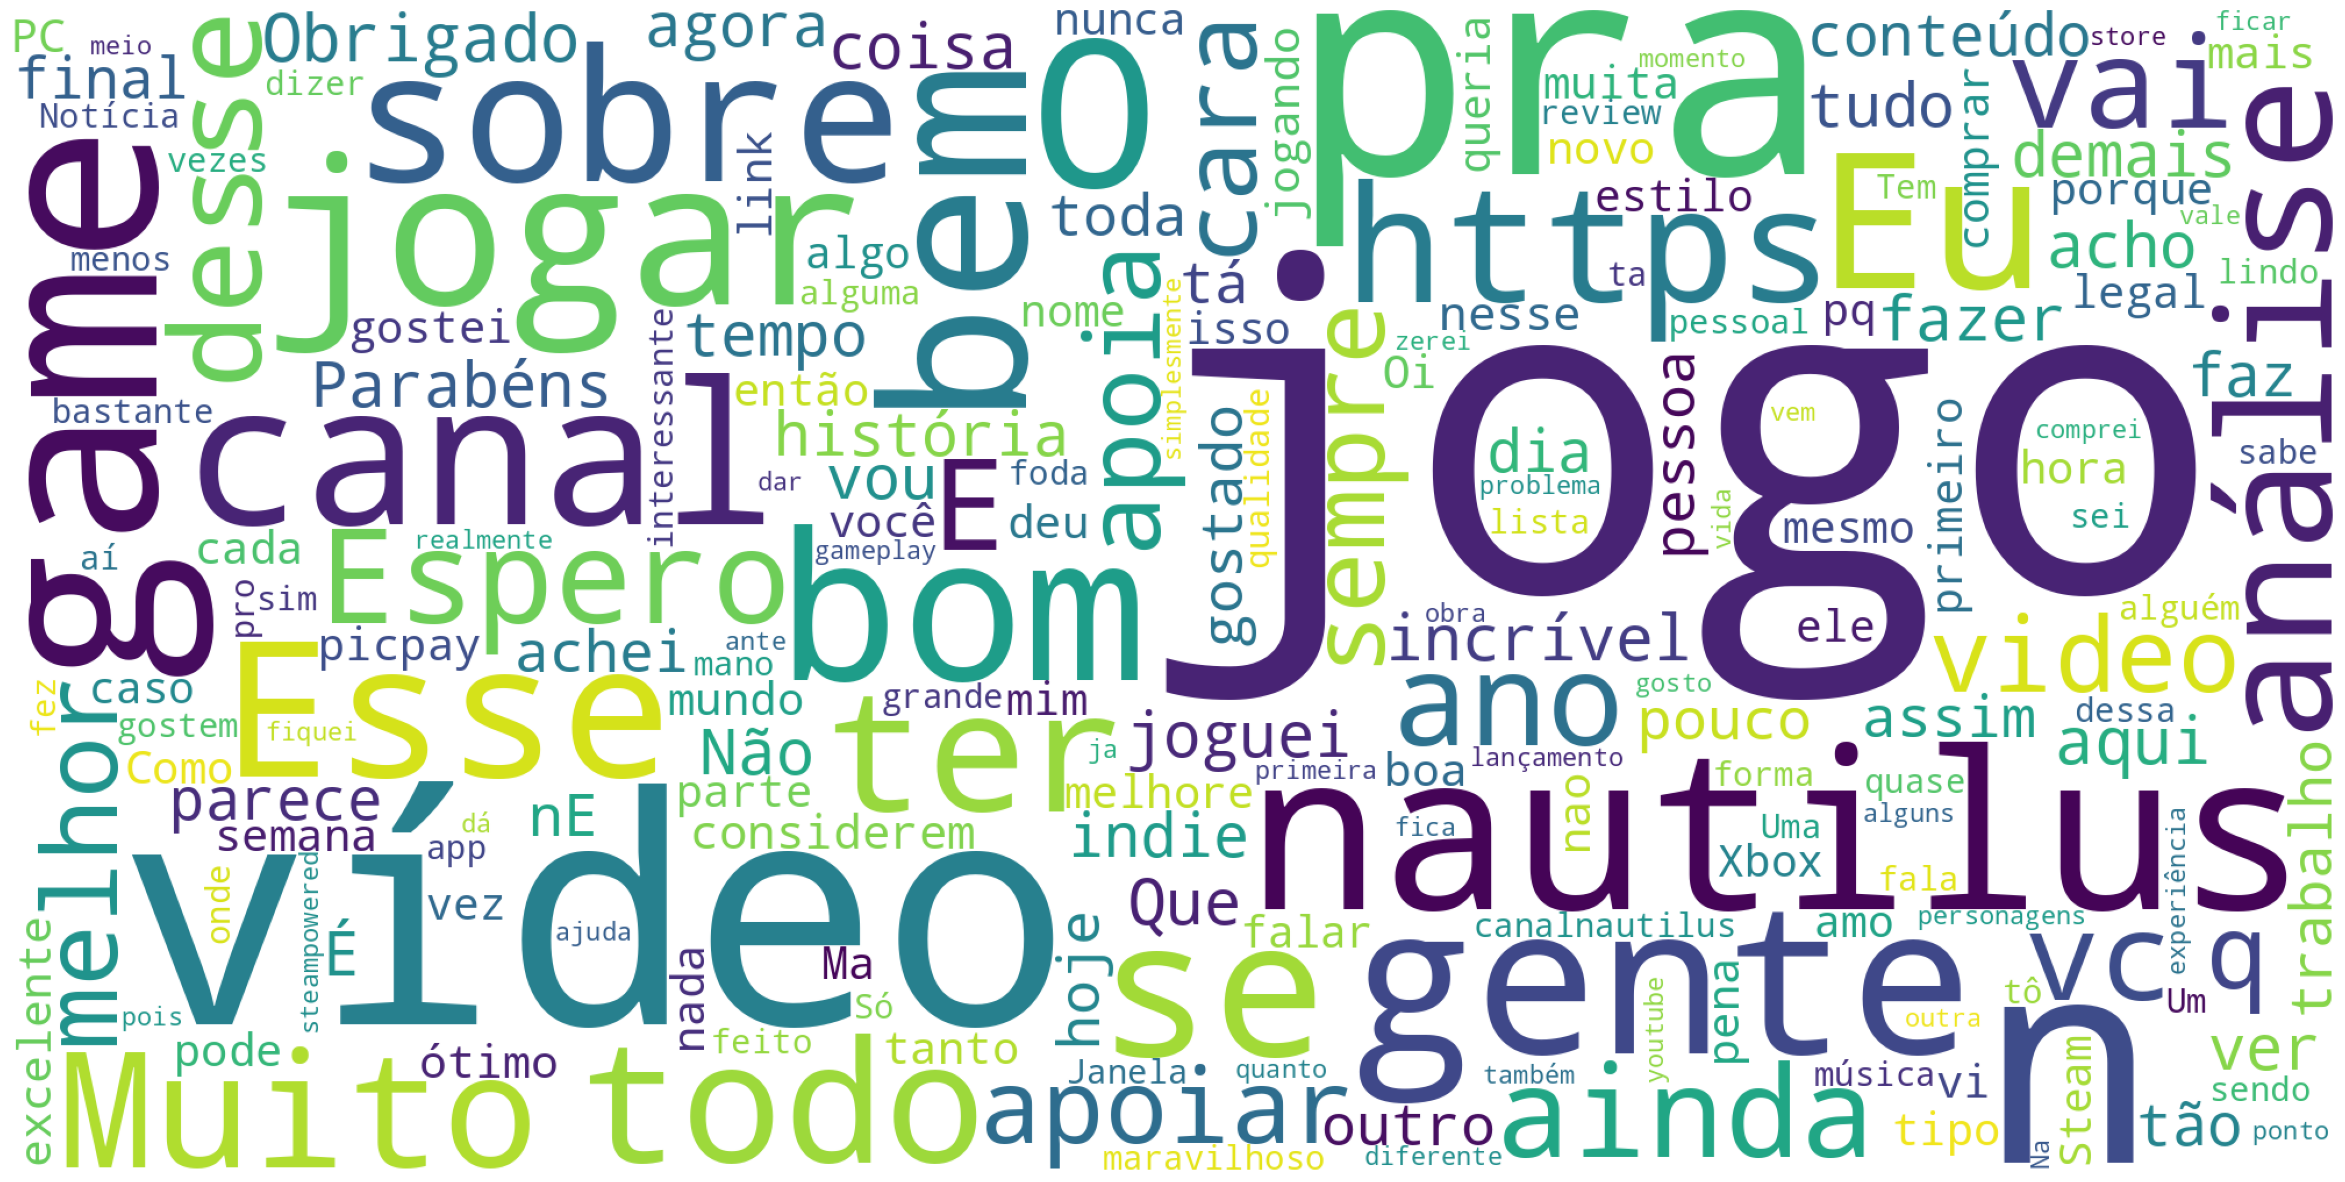

In [ ]:
# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");
stop_words = set(stopwords.words('portuguese'))

c_df = pd.read_csv('comments_nautilusl.csv')


c_df['title_no_stopwords'] = c_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])
all_words_c = list([a for b in c_df['title_no_stopwords'].tolist() for a in b])

all_words_str_c = ' '.join(all_words_c)

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='white',
                      colormap='viridis', collocations=False).generate(all_words_str_c)
plot_cloud(wordcloud)

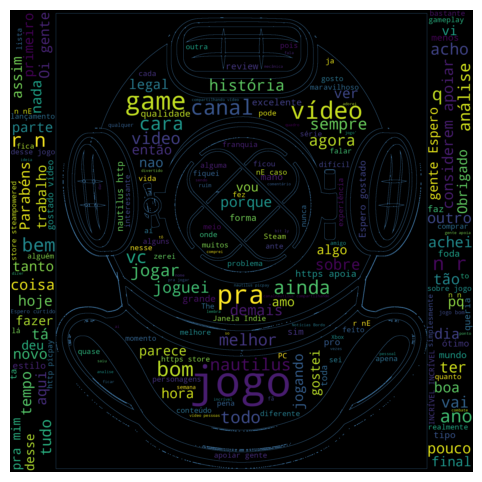

In [ ]:
# Criar a nuvem de palavras
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='black',
                      mask=naut_mask,
                      stopwords=stop_words,
                      contour_color='steelblue',
                      contour_width=1).generate(all_words_str_c)

# Exibir a nuvem de palavras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Não mostrar os eixos
plt.show()

# Verificando as visualizações

Produzindo um scatterplot tendo os dias da semana com uma legenda com o dia da semana dos vídeos.

O tamanho da bolinha aumenta de acordo com a quantidade de comentários do vídeos.

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="viewCount", y="likeCount", color="pushblishDayName",
                 size='commentCount',hover_data=['tagsCount'])
fig.show()

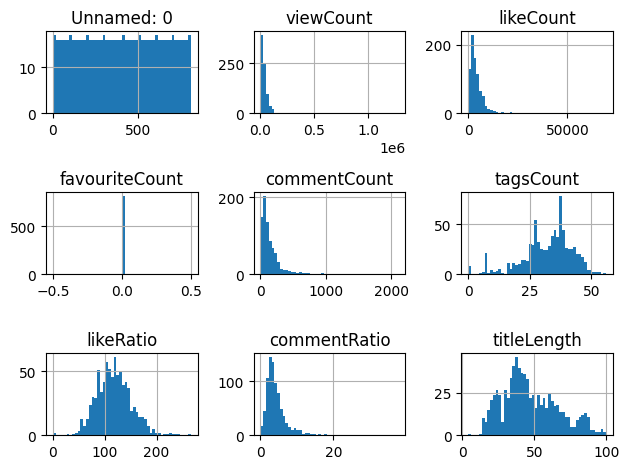

In [ ]:
# prompt: histogram

df.hist(bins=50)

plt.tight_layout()
plt.show()


# Ranking das Visualizações

Criando uma tabela ranqueando o top 10 de vídeos mais vistos.

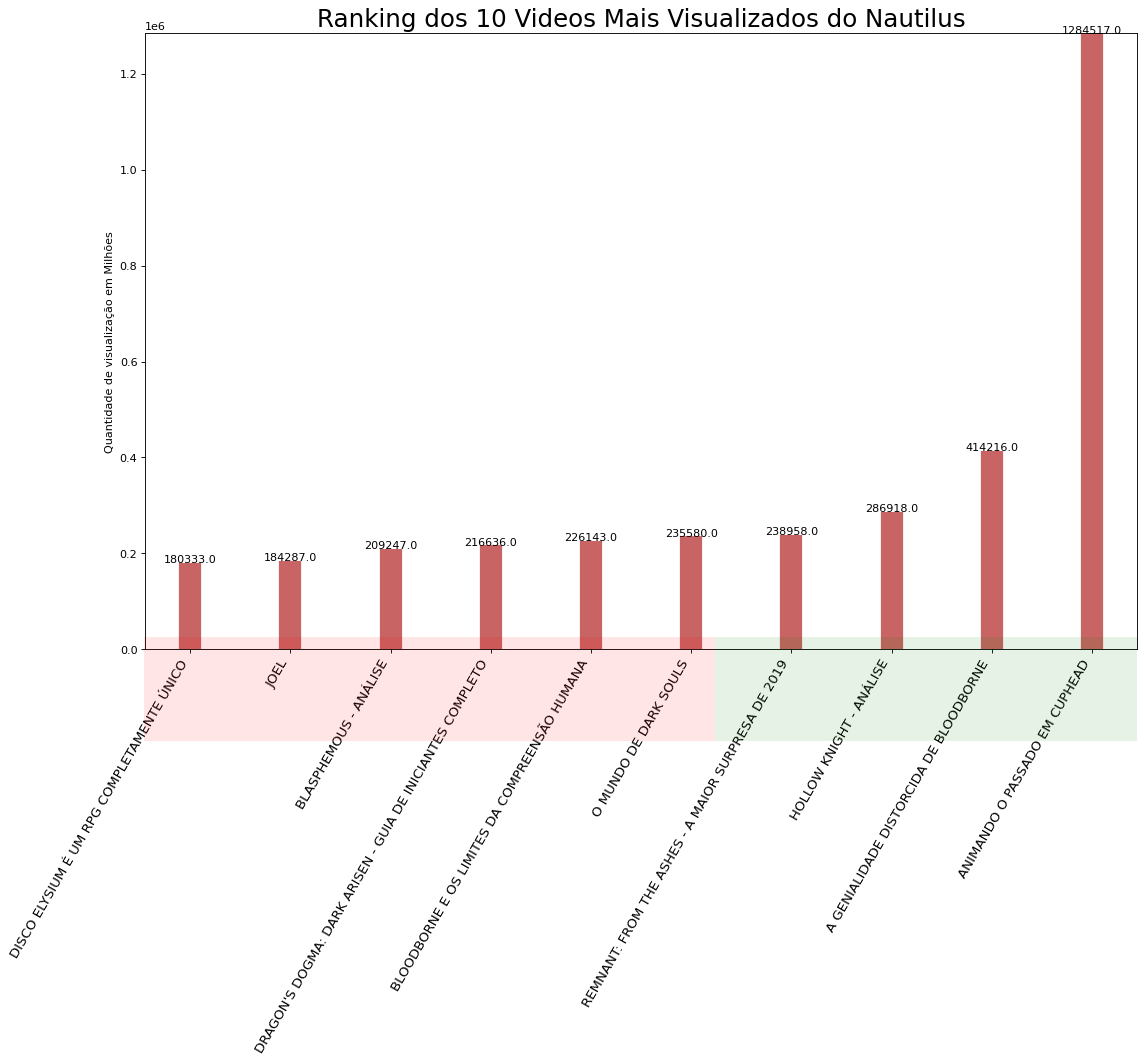

In [ ]:
import matplotlib.patches as patches

top10_view=df.sort_values('viewCount', ascending=False).head(10)

df_sorted = top10_view[['viewCount', 'title', 'likeCount']].sort_values('viewCount')

df_sorted.reset_index(drop=True, inplace=True)

# Desenhar o gráfico
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi=80)
ax.vlines(x=df_sorted.index, ymin=0, ymax=df_sorted.viewCount, color='firebrick', alpha=0.7, linewidth=20)

# Adicionar anotações
for i, viewCount in enumerate(df_sorted.viewCount):
    ax.text(i, viewCount + 50, round(viewCount, 1), horizontalalignment='center')

# Título, rótulos, ticks e limites
ax.set_title('Ranking dos 10 Videos Mais Visualizados do Nautilus', fontdict={'size':22})
ax.set(ylabel='Quantidade de visualização em Milhões', ylim=(0, df_sorted.viewCount.max() + 500))

# Configurar os rótulos do eixo X
plt.xticks(df_sorted.index, df_sorted.title.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Adicionar patches coloridos no eixo X (opcional)
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

# Mostrar o gráfico
plt.show()

# Ranking de Likes

Criando uma tabela ranqueando o top 10 de vídeos mais curtidos.

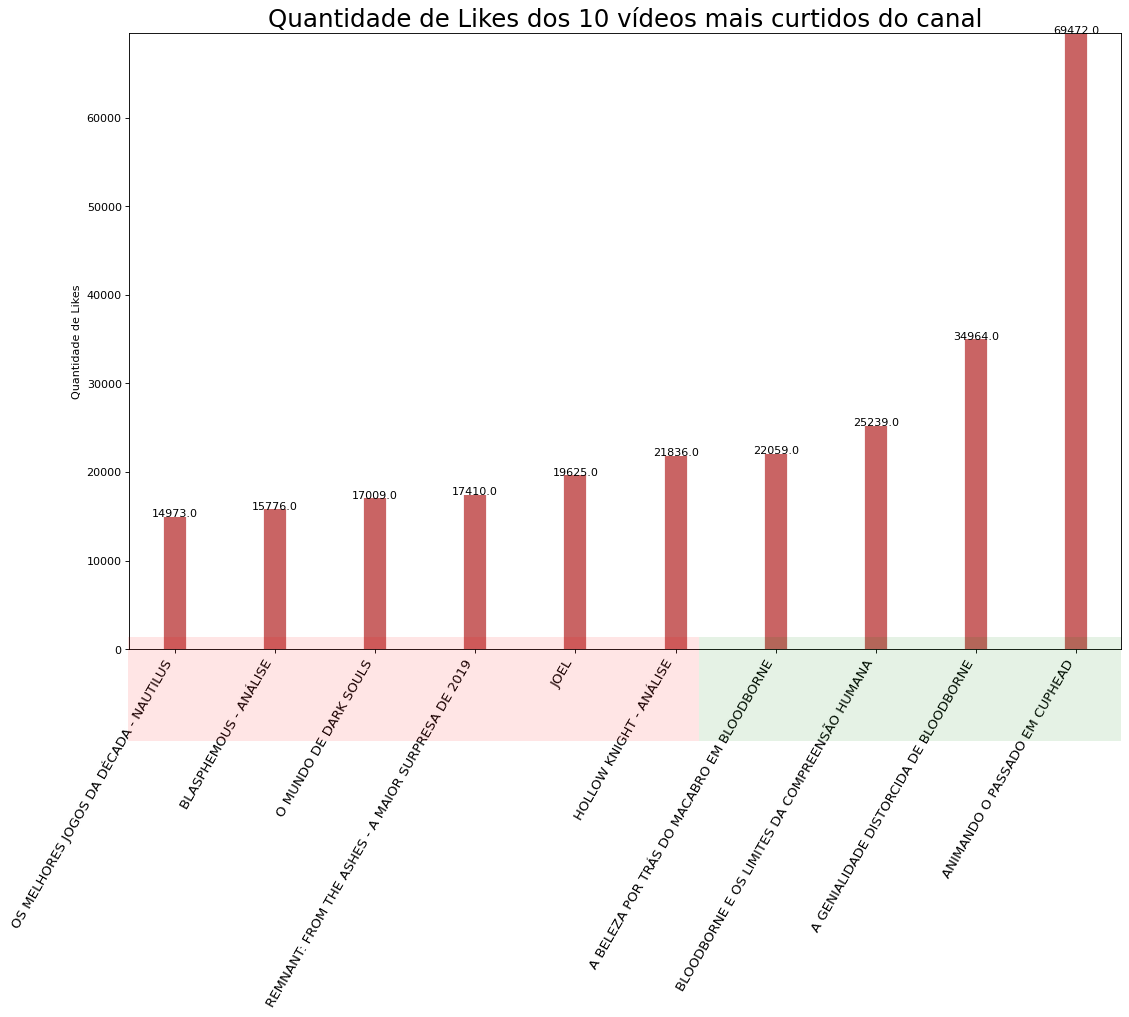

In [ ]:
top10_likes=df.sort_values('likeCount', ascending=False).head(10)

df_sorted = top10_likes[['viewCount', 'title', 'likeCount']].sort_values('likeCount')
df_sorted.reset_index(drop=True, inplace=True)

# Desenhar o gráfico
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi=80)
ax.vlines(x=df_sorted.index, ymin=0, ymax=df_sorted.likeCount, color='firebrick', alpha=0.7, linewidth=20)

# Adicionar anotações
for i, likeCount in enumerate(df_sorted.likeCount):
    ax.text(i, likeCount + 10, round(likeCount, 1), horizontalalignment='center')

# Título, rótulos, ticks e limites
ax.set_title('Quantidade de Likes dos 10 vídeos mais curtidos do canal', fontdict={'size':22})
ax.set(ylabel='Quantidade de Likes', ylim=(0, df_sorted.likeCount.max() + 50))

# Configurar os rótulos do eixo X
plt.xticks(df_sorted.index, df_sorted.title.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Adicionar patches coloridos no eixo X (opcional)
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

# Mostrar o gráfico
plt.show()

# Filtrando os dados e vendo correlações

In [ ]:
# Transformando a duração de tempo em segundos
df['duration_seconds'] = pd.to_timedelta(df['duration'])
df['duration_seconds'] = df['duration_seconds'].dt.total_seconds()
df['duration_seconds'] = df['duration_seconds'].astype(int)
df['duration_seconds']

,duration_seconds
0,1083
1,7299
2,434
3,597
4,996
...,...
804,549
805,493
806,613
807,816


In [ ]:
c_df.head(10)

,Unnamed: 0,video_id,comments,title_no_stopwords
0,0,OmKMQ-r4V74,['Torne-se um desenvolvedor de jogos com um cl...,"[['Torne-se, desenvolvedor, jogos, clique:, ht..."
1,1,CnsBEnALOsM,[],[[]]
2,2,ypPOwC54eEE,"['Kusan tá promissor demais, viu? Espero que g...","[['Kusan, tá, promissor, demais,, viu?, Espero..."
3,3,YnTphqpwHeM,['Jogue Genshin Impact via Epic Games Store! U...,"[['Jogue, Genshin, Impact, via, Epic, Games, S..."
4,4,UrfmjEvtPzk,['Use nosso link: https://nordvpn.com/nautilus...,"[['Use, link:, https://nordvpn.com/nautilus, -..."
5,5,x_nLwMQHVH8,"['Obrigado por mais um Periscópio.', 'A vontad...","[['Obrigado, Periscópio.',, 'A, vontade, jogar..."
6,6,XuZXW-OUAFU,['Obrigado Nuuvem por lembrar da gente para o ...,"[['Obrigado, Nuuvem, lembrar, gente, lançament..."
7,7,KfCwojvCmDk,[],[[]]
8,8,5NXPuaiHL0o,"['O Escudeiro Valente é um jogão, viu? Gostei ...","[['O, Escudeiro, Valente, jogão,, viu?, Gostei..."
9,9,BAor-qazz4c,"['Obrigado por mais um Café com Videogames.', ...","[['Obrigado, Café, Videogames.',, '30, FPS, 20..."


In [ ]:
import plotly.express as px

fig = px.scatter(df, x="likeCount", y="viewCount", color="pushblishDayName",
                 size='commentCount',hover_data=['duration_seconds'])
fig.show()

NameError: name 'df' is not defined

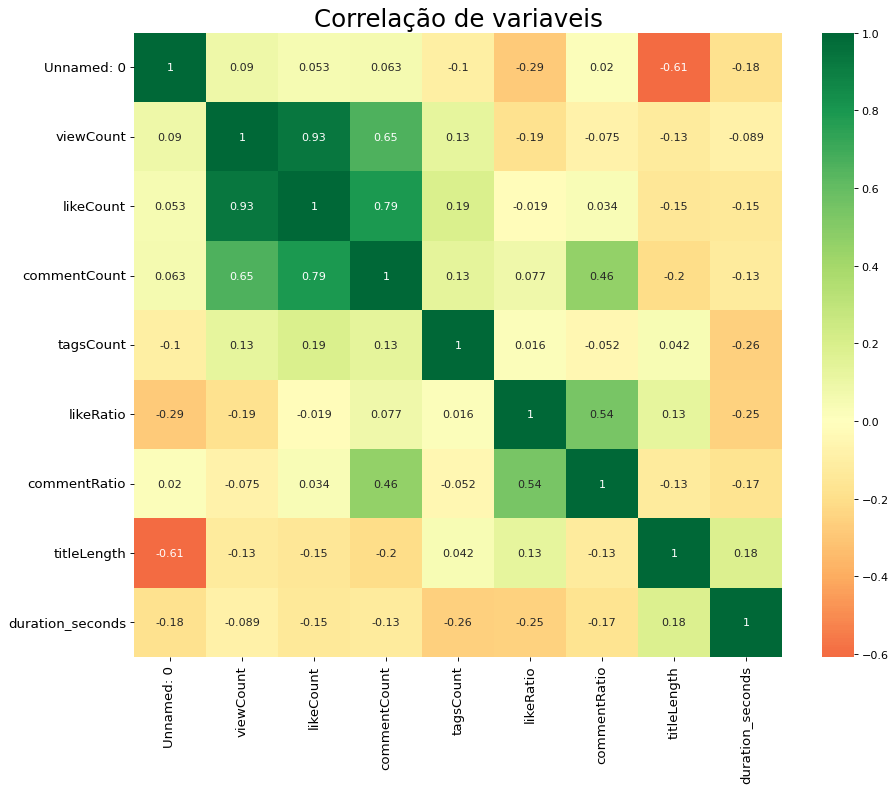

In [ ]:
df_c = df.select_dtypes(include=['number'])
df_c.drop('favouriteCount', axis=1, inplace=True)
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_c.corr(), xticklabels=df_c.corr().columns, yticklabels=df_c.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlação de variaveis', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

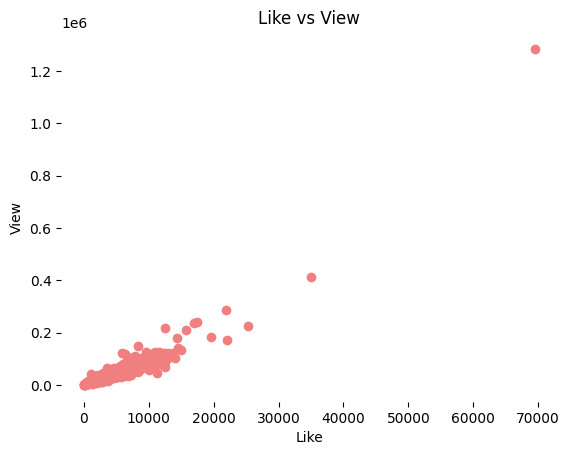

In [ ]:
plt.scatter(df['likeCount'], df['viewCount'], color = 'lightcoral')
plt.title('Like vs View')
plt.xlabel('Like')
plt.ylabel('View')
plt.box(False)
plt.show()

# Aplicando a regressão linear
Prevendo as variáveis com maior correlação e analisando o quão bom o modelo é usando Regressão Linear.

Foi utilizada escala logaritmica, após perceber que os números são muito inflados.

RMSE: 0.28796507641335206


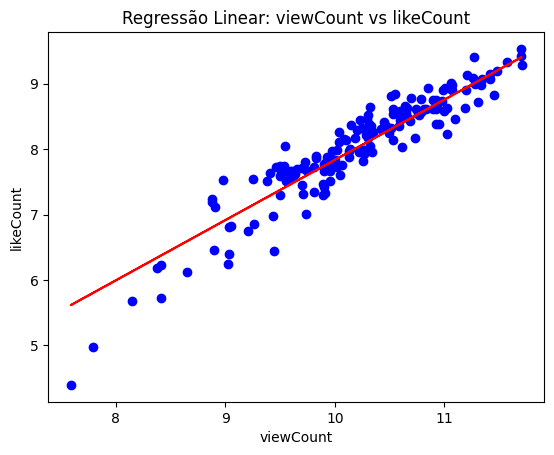

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Aplicar transformação logarítmica
X = np.log1p(df[['viewCount']] ) # Variável independente (X)
y = np.log1p(df['likeCount'])    # Variável dependente (y)

# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Criar o modelo de regressão linear
modelo = LinearRegression()

# 5. Treinar o modelo
modelo.fit(X_train, y_train)

# 6. Fazer previsões
y_pred = modelo.predict(X_test)

# 7. Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

# 8. Plotar os resultados
plt.scatter(X_test, y_test, color='blue')  # Dados reais
plt.plot(X_test, y_pred, color='red')      # Linha de regressão
plt.title('Regressão Linear: viewCount vs likeCount')
plt.xlabel('viewCount')
plt.ylabel('likeCount')
plt.show()

RMSE: 1261.891444951571


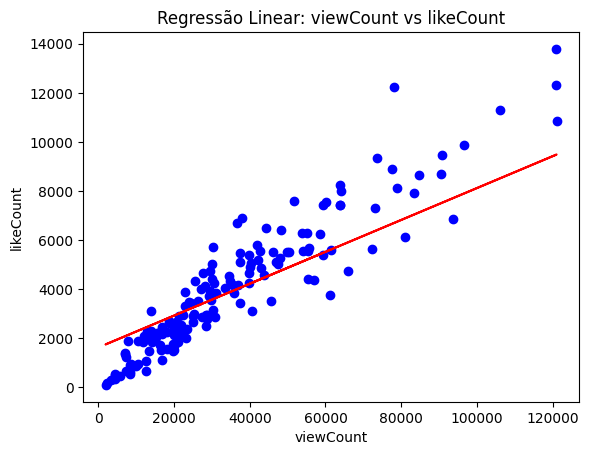

In [ ]:
# aplicando sem escala logaritmica

X = (df[['viewCount']] ) # Variável independente (X)
y = (df['likeCount'])    # Variável dependente (y)

# 3. Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Criar o modelo de regressão linear
modelo = LinearRegression()

# 5. Treinar o modelo
modelo.fit(X_train, y_train)

# 6. Fazer previsões
y_pred = modelo.predict(X_test)

# 7. Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

# 8. Plotar os resultados
plt.scatter(X_test, y_test, color='blue')  # Dados reais
plt.plot(X_test, y_pred, color='red')      # Linha de regressão
plt.title('Regressão Linear: viewCount vs likeCount')
plt.xlabel('viewCount')
plt.ylabel('likeCount')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

R²: 0.8808904667378336


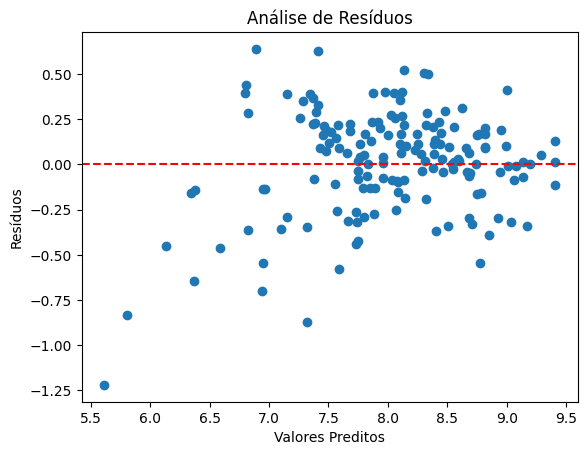

In [ ]:
plt.scatter(y_pred, (y_test - y_pred))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f'RMSE Cross-Validation: {rmse_scores.mean()}')

RMSE Cross-Validation: 0.3165424990070409


# Mostrando vídeos ao longo do tempo

Fazendo a visualização de vídeos ao longo de tempo que foi publicado

In [ ]:
# Converter a coluna 'publishedAt' para o tipo datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Criar colunas separadas para ano e mês
df['year'] = df['publishedAt'].dt.year
df['month'] = df['publishedAt'].dt.month
df['day'] = df['publishedAt'].dt.day
df['year_month'] = df['publishedAt'].dt.to_period('M')  # Para combinar ano e mês

# Verificar o tipo da coluna após a conversão
df.dtypes

<ipython-input-9-17d42f57f5ec>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['publishedAt'].dt.to_period('M')  # Para combinar ano e mês


,0
Unnamed: 0,int64
video_id,object
channelTitle,object
title,object
description,object
tags,object
publishedAt,"datetime64[ns, UTC]"
viewCount,float64
likeCount,float64
favouriteCount,float64


  year_month  viewCount
0    2015-05   120996.0
1    2015-08     7029.0
2    2015-09    13130.0
3    2015-10    82944.0
4    2015-12    62542.0


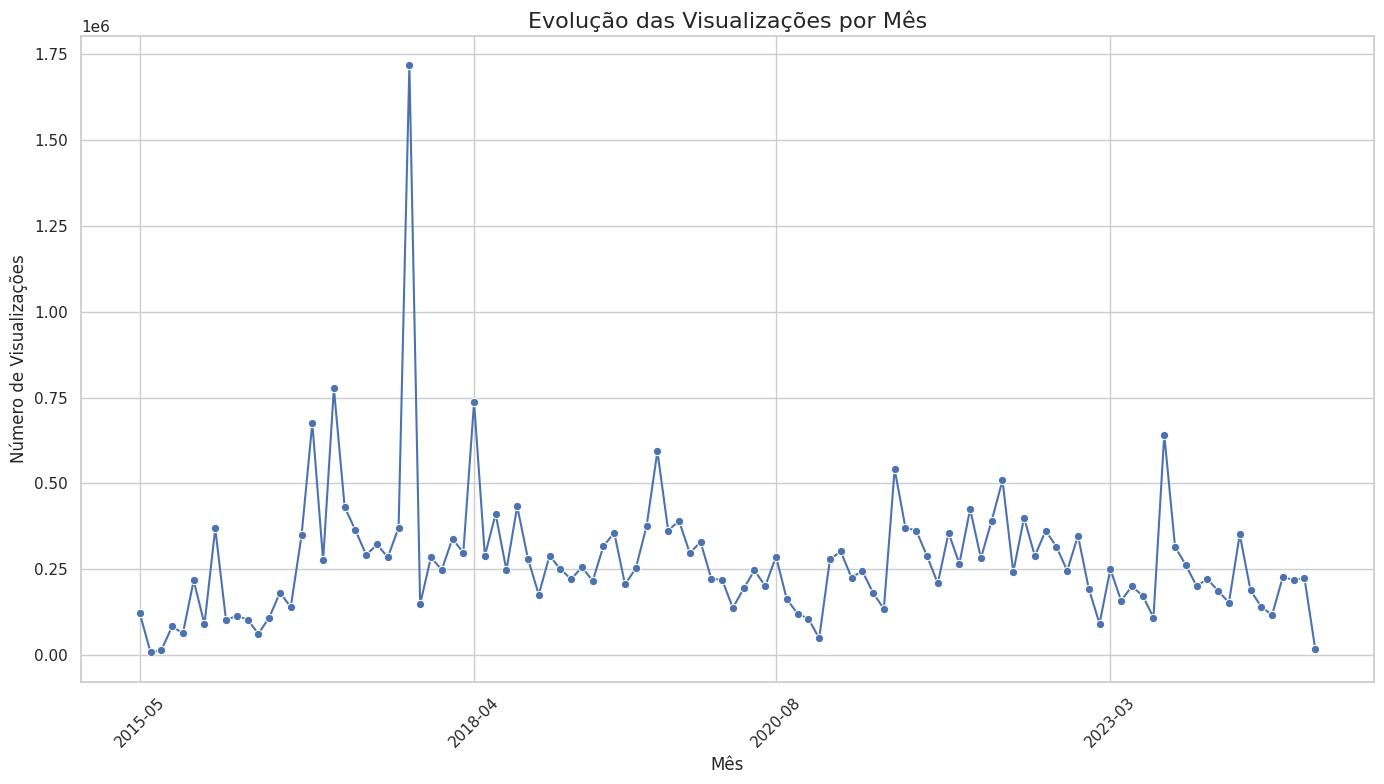

In [ ]:
import matplotlib.dates as mdates

# Agrupar por mês e somar as visualizações
monthly_views = df.groupby('year_month')['viewCount'].sum().reset_index()

# Exibir as primeiras linhas do agrupamento
print(monthly_views.head())
# Converter a coluna 'year_month' para string, se necessário
monthly_views['year_month'] = monthly_views['year_month'].astype(str)
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar gráfico de linha para a evolução das visualizações ao longo do tempo
plt.figure(figsize=(14,8))
sns.lineplot(x='year_month', y='viewCount', data=monthly_views, marker="o")

# Definir o espaçamento dos rótulos no eixo x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Exibir a cada 3 meses, por exemplo

# Rotacionar os rótulos para legibilidade
plt.xticks(rotation=45)


# Ajustes no gráfico
plt.title('Evolução das Visualizações por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Número de Visualizações', fontsize=12)

plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
print(df['viewCount'].dtype)
print(df['year_month'].dtype)

float64
period[M]


# Conclusões

* Pode-se perceber que é possível prever valores de Likes e Visualizações através de um modelo de regressão linear em escala logaritmica.

* Os vídeos mais curtidos do Top 10 não é idêntico ao de Top 10 de visualizações, mesmo sendo a grande maioria correlata.

* Os vídeos mais vistos em sua grande maioria tem conteúdo relacionado a Soulslike, como Dark Souls, Bloodborne, Elden Ring, Remnant.

* Pela visão de temporalidade dos vídeos, pode se perceber uma certa regularidade de padrões de visualização

* As variáveis viewCount, likeCount e commentCount tem alta correlação entre si. O que pode ser algo proveniente do algoritmo do YouTube que acaba influenciando com que vídeos com mais comentários, terão mais likes, e com mais likes terão mais views e vice-versa.

* A nuvem de palavras da comunidade mostra muitas palavras de cunho positivo aos vídeos. Algo bem positivo :)





